---
# The gaussian probability distribution function (PDF)
---

In this script, we display several examples of 2-D gaussian PDF.

In its matrix-form, the equation for the N-D gausian PDF reads like this: 

<blockquote>  $P(\bf{x}) = \frac{1}{(2\pi)^{0.5N} |\Sigma|^{0.5}} \exp{[-\frac{1}{2}(\bf{x}-\bf{\mu})^\top \Sigma^{-1} (\bf{x}-\bf{\mu})]}$  </blockquote>

where 

<blockquote> 
$
\begin{align}
\bf{x} &= [x_{1} x_{2} \cdots  x_{N}]^\top \\
\bf{\mu} &= [\mu_{1} \mu_{2} \cdots \mu_{N}]^\top  \\
\Sigma &= \begin{pmatrix} \sigma_{1}^2 & \sigma_{1,2} & \cdots & \sigma_{1,N} \\ 
\sigma_{1,2} & \sigma_{2}^2 & \cdots & \sigma_{2,N} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{1,N} & \sigma_{2,N} & \cdots & \sigma_{N}^2 \end{pmatrix}
\end{align}
$                
</blockquote>
                  

In the 2-D case, the covariance matrix $\Sigma$ simplifies to
<blockquote> 
$
\begin{align}
\Sigma & = \begin{pmatrix} \sigma_{1}^2 & \sigma_{1,2} \\ \sigma_{1,2} & \sigma_{2}^2 \end{pmatrix} \\
&= \begin{pmatrix} \sigma_{x_{1}}^2 & \rho\sigma_{x_{1}}\sigma_{x_{2}} \\ \rho\sigma_{x_{1}}\sigma_{x_{2}} & \sigma_{x_{2}}^2 \end{pmatrix}
\end{align}
$                
</blockquote>
where $\rho$ is the correlation factor between the $x_{1}$ and $x_{2}$ data. 

It is common to use $x$ and $y$ instead of $x_{1}$ and $x_{2}$ but we will stick to the more general notation. 


In [1]:
print(__doc__)

# Author: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy import stats
from scipy.stats import multivariate_normal

import seaborn as sns
sns.set(color_codes=True)

# Used for reproductibility of the results
np.random.seed(43)

Automatically created module for IPython interactive environment


Let us first define the printing function to show the results.

In [2]:
def show_PDF(X):
    
    # Generate a spatial grid where the PDF will be evaluated locally
    x_min, x_max = 0., 4.
    y_min, y_max = 0., 4.
    h = 0.01
    x, y = np.mgrid[x_min:x_max:h, y_min:y_max:h]
    pos = np.dstack((x, y))

    # Generator for the 2-D PDF 
    rv = multivariate_normal(Mu,Sigma)
    
    
    # Remove datapoints outside figure limits
    X = X[(X[:,0]>x_min) & (X[:,0]<x_max) & (X[:,1]>y_min) & (X[:,1]<y_max)]

    fig = plt.figure(figsize = (10,10))
    cm = plt.get_cmap('viridis')

    ax = fig.add_subplot(111)
    ax.contourf(x, y, rv.pdf(pos),cmap=cm)

    ax.scatter(X[:, 0], X[:, 1], c="w", s=30, linewidth=1, marker="o")

    # Origin of the PDF
    plt.text(Mu[0], Mu[1], '$\mu$', horizontalalignment='center', verticalalignment='center', fontsize=20, color='red')

    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.axis('equal')

    ax.set_xlabel('$x_{1}$',fontsize=18)
    ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
    ax.yaxis.set_label_coords(-0.1,0.5)
    ax.xaxis.set_label_coords(0.5, -0.05)
    fig.tight_layout()

    plt.savefig(figName + '.png')
    plt.savefig(figName + '.pdf')

    plt.show()

## Example I: Isotropic distribution without correlation

The standard deviations $\sigma_{x1}$ and $\sigma_{x2}$ are identical with no correlation 
between $x_{1}$ and $x_{2}$.

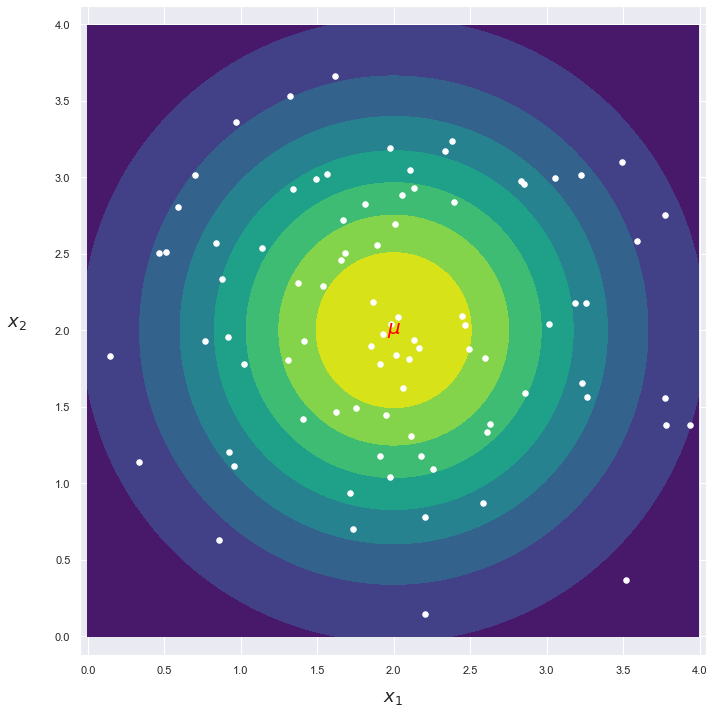

In [3]:
# Parameters
Mu = [2., 2.]

sigma_x1 = 1.0
sigma_x2 = 1.0
rho = 0.
Sigma = [(sigma_x1**2, rho*sigma_x1*sigma_x2), (rho*sigma_x1*sigma_x2, sigma_x2**2)]

# Create a dataset of N random points
n = 100
X = np.random.multivariate_normal(Mu, Sigma, n)

figName = "Example_of_isotropic_2D_gaussian_PDF_without_correlation"

show_PDF(X)

## Example II: Anisotropic distribution without correlation

The standard deviations $\sigma_{x1}$ and $\sigma_{x2}$ are different with no correlation 
between $x_{1}$ and $x_{2}$.

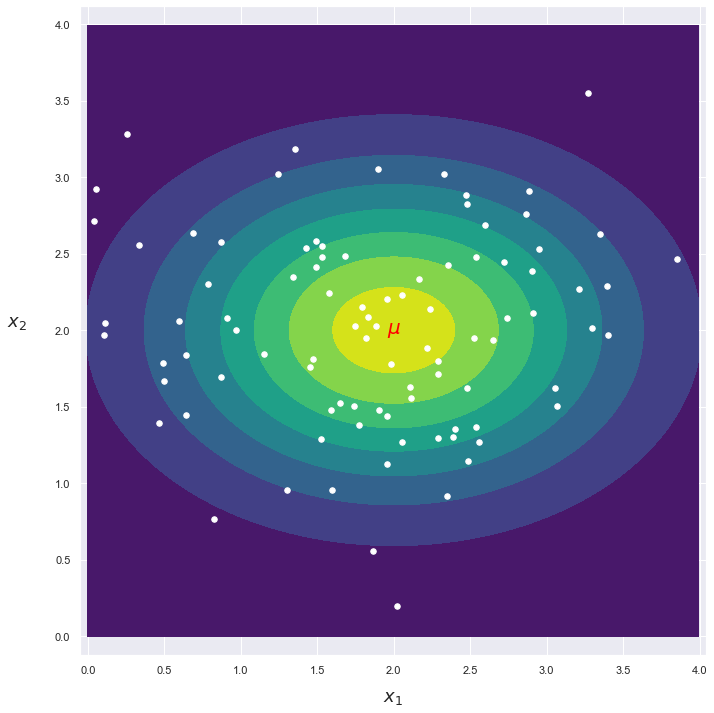

In [4]:
# Parameters
Mu = [2., 2.]

sigma_x1 = 1.
sigma_x2 = 0.7
rho = 0.
Sigma = [(sigma_x1**2, rho*sigma_x1*sigma_x2), (rho*sigma_x1*sigma_x2, sigma_x2**2)]

# Create a dataset of N random points
n = 100
X = np.random.multivariate_normal(Mu, Sigma, n)

figName = "Example_of_anisotropic_2D_gaussian_PDF_without_correlation"

show_PDF(X)

## Example III: More general case

The standard deviations $\sigma_{x1}$ and $\sigma_{x2}$ are different with a 90% correlation 
between $x_{1}$ and $x_{2}$.

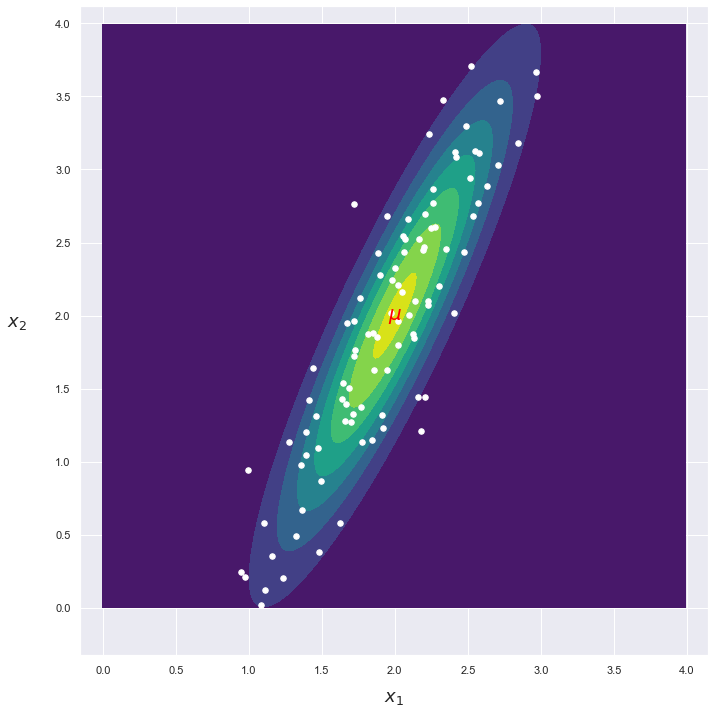

In [5]:
# Parameters
Mu = [2., 2.]

sigma_x1 = 0.5
sigma_x2 = 1.0
rho = 0.9
Sigma = [(sigma_x1**2, rho*sigma_x1*sigma_x2), (rho*sigma_x1*sigma_x2, sigma_x2**2)]

# Create a dataset of N random points
n = 100
X = np.random.multivariate_normal(Mu, Sigma, n)

figName = "Example_of_correlated_2D_gaussian_PDF"

show_PDF(X)